# Playing with Coronavirus Timeseries -v3

- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset


- 07/10/20
- James M. Irving, Ph.D.

## Notes:

- This notebook is the 3rd iteration of the dashboard.
- I will only run minimal code needed to get the data to begin visualizing.

- The plan is to add additional information/plots

In [19]:
import functions as fn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
!pip install -U fsds
from fsds.imports import *

Requirement already up-to-date: fsds in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.2.27)


In [11]:
import os,glob,sys
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

import cufflinks as cf
cf.go_offline()
cf.set_config_file(sharing='public',theme='solar',offline=True)

In [12]:
import functions as fn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reference Data

In [13]:
world_pop = fn.download_world_pop()
world_pop = world_pop[['Country (or dependency)','Population (2020)']]
world_pop

File saved to Reference Data/population-by-country-2020.zip


,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
...,...,...
230,Montserrat,4993
231,Falkland Islands,3497
232,Niue,1628
233,Tokelau,1360


In [21]:
state_pops = fn.load_us_reference_info()
state_pops

,State,Abbreviation,POPESTIMATE2019
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017804
4,California,CA,39512223
5,Colorado,CO,5758736
6,Connecticut,CT,3565287
7,Delaware,DE,973764
8,District of Columbia,DC,705749
9,Florida,FL,21477737


# TO DO (11/24/20)

- Verify if BaselineData class' `get_group_ts` is aggregating the way it should.
- Finish making last_N_days version of map
    - Take difference of day-period begin/end for values

# Main Kaggle Dataset - Get US States

# 📦class `CoronaData`

In [14]:
corona = fn.CoronaData(verbose=True,run_workflow=True)
corona

[i] DOWNLOADING DATA USING KAGGLE API
	https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
	- Downloaded dataset .zip and extracted to:"New Data/"
	- Extraction Complete.


,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


[i] There are 226 countries in the datatset
[i] Dates Covered:
	From 01-22-2020 to 11-15-2020


------------------------------------------------------------
[i] CovidTrackingProject Contents:
------------------------------------------------------------

METHODS:
	calculate_per_capita
	download_coronavirus_data
	get_and_clean_US
	get_data_fpath
	get_group_ts
	load_raw_df
	load_us_reference_info
	set_datetime_index

ATTRIBUTES
	STATES
	df
	df_us
	raw_df
	reference_data

In [15]:
# raw_df = corona._df
# raw_df['Country/Region'].value_counts()#.sort_index().tail(20)

In [17]:
## GET df_us to check values vs manual creation
check_US = corona.df_us
check_US

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2020-11-11,Puerto Rico,US,39120.0,901.0,0.0,PR,1.224914e-02,0.000282,0.0
2020-11-12,Puerto Rico,US,40452.0,909.0,0.0,PR,1.266621e-02,0.000285,0.0
2020-11-13,Puerto Rico,US,41119.0,914.0,0.0,PR,1.287506e-02,0.000286,0.0


### Code used to create df_us
```python
def get_and_clean_US(self,df=None,#save_as = 'Reference Data/united_states_abbreviations.csv',
                         make_date_index=True,per_capita=True):
        """Takes raw df loaded and extracts United States and processes
        all state names to create new abbreviation column 'state'.
        """
        import pandas as pd
        if df is None:
            df= self._df.copy()
            
        ## Get only US
        df_us = df.groupby('Country/Region').get_group('US').copy() 
        state_lookup = self.load_us_reference_info()


        ## Make renaming dict for states
        STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
        STATE_DICT.update({'Chicago':'IL',
                          'Puerto Rico':'PR',
                          'Virgin Islands':'VI',
                          'United States Virgin Islands':'VI'})

        ## Separately Process Rows that contain a city, state 
        df_city_states = df_us[df_us['Province/State'].str.contains(',')]


        ## Finding City Abbreviations in city_states
        import re
        state_expr = re.compile(r"[A-Z\.]{2,4}")
        df_city_states['state'] = df_city_states['Province/State'].apply(state_expr.findall)
        df_city_states = df_city_states.explode('state')


        ## Seperately process Rows that do not contain a city,state
        df_states = df_us[~df_us['Province/State'].str.contains(',')]
        df_states['state'] =  df_states['Province/State'].map(STATE_DICT)

        ## Combining data frame back together
        df = pd.concat([df_states,df_city_states]).sort_index()
#         df = df.dropna(subset=['state'])

        ## Fix some stragglers (like D.C. vs DC)
        df['state'] = df['state'].replace('D.C.','DC')
        
        ## Combine Cleaned Data 
        df = pd.merge(df, state_lookup,left_on='state',right_on="Abbreviation")
        
        df.rename({'State':'State Name'},inplace=True,axis=1)
        df.drop(columns=['Abbreviation','State Name'],inplace =True)
        
    
        ## Add Population Data
        if per_capita:

            for col in  ['Confirmed','Deaths','Recovered']:
                df[f"{col} Per Capita"] = df[col]/df['POPESTIMATE2019']

            ## Remove Population 
            df.drop('POPESTIMATE2019',axis=1,inplace=True)

        if make_date_index:
            df = self.set_datetime_index(df)
        
#         df.drop(columns=['Province/State'],inplace=True)

        self.df_us = df.copy()
#         self.US = df.copy()
        return df
```

In [26]:
raw_df = corona._df
raw_df

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
156287,2020-11-15,Zaporizhia Oblast,Ukraine,18484.0,164.0,3021.0
156288,2020-11-15,Zeeland,Netherlands,5041.0,86.0,0.0
156289,2020-11-15,Zhejiang,Mainland China,1291.0,1.0,1279.0
156290,2020-11-15,Zhytomyr Oblast,Ukraine,22225.0,368.0,12266.0


In [31]:
def get_and_clean_US(df,#save_as = 'Reference Data/united_states_abbreviations.csv',
                         make_date_index=True):
        """Takes raw df loaded and extracts United States and processes
        all state names to create new abbreviation column 'state'.
        """
        import pandas as pd

        ## Get only US
        df_us = df.groupby('Country/Region').get_group('US').copy() 
        
        ## Load state lookup
        state_lookup = fn.load_us_reference_info()
        state_lookup.drop(columns=['POPESTIMATE2019'],inplace=True)


        ## Make renaming dict for states
        STATE_DICT = dict(zip(state_lookup['State'],state_lookup['Abbreviation']))
        STATE_DICT.update({'Chicago':'IL',
                          'Puerto Rico':'PR',
                          'Virgin Islands':'VI',
                          'United States Virgin Islands':'VI'})

        ## Separately Process Rows that contain a city, state 
        df_city_states = df_us[df_us['Province/State'].str.contains(',')]


        ## Finding City Abbreviations in city_states
        import re
        state_expr = re.compile(r"[A-Z\.]{2,4}")
        df_city_states['state'] = df_city_states['Province/State'].apply(state_expr.findall)
        df_city_states = df_city_states.explode('state')


        ## Seperately process Rows that do not contain a city,state
        df_states = df_us[~df_us['Province/State'].str.contains(',')]
        df_states['state'] =  df_states['Province/State'].map(STATE_DICT)

        ## Combining data frame back together
        df = pd.concat([df_states,df_city_states]).sort_index()
#         df = df.dropna(subset=['state'])

        ## Fix some stragglers (like D.C. vs DC)
        df['state'] = df['state'].replace('D.C.','DC')

        ## Combine Cleaned Data 
        df = pd.merge(df, state_lookup,left_on='state',right_on="Abbreviation")

        df.rename({'State':'State Name'},inplace=True,axis=1)
        df.drop(columns=['Abbreviation','State Name'],inplace =True)


        if make_date_index:
            
            # df = self.set_datetime_index(df)
            df['Date'] = pd.to_datetime(df["Date"],infer_datetime_format=True)
            df.set_index("Date",inplace=True)


        return df

In [32]:
# sorted(raw_df['Country/Region'].unique())
us = raw_df.groupby('Country/Region').get_group("US")
us

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
31,2020-01-22,Washington,US,1.0,0.0,0.0
69,2020-01-23,Washington,US,1.0,0.0,0.0
117,2020-01-24,Washington,US,1.0,0.0,0.0
118,2020-01-24,Chicago,US,1.0,0.0,0.0
158,2020-01-25,Washington,US,1.0,0.0,0.0
...,...,...,...,...,...,...
156259,2020-11-15,Virginia,US,201960.0,3800.0,0.0
156268,2020-11-15,Washington,US,130040.0,2519.0,0.0
156271,2020-11-15,West Virginia,US,33659.0,582.0,0.0
156273,2020-11-15,Wisconsin,US,329924.0,2751.0,0.0


In [33]:
df_us = get_and_clean_US(us)
df_us

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state
Date,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA
2020-01-23,Washington,US,1.0,0.0,0.0,WA
2020-01-24,Washington,US,1.0,0.0,0.0,WA
2020-01-25,Washington,US,1.0,0.0,0.0,WA
2020-01-26,Washington,US,1.0,0.0,0.0,WA
...,...,...,...,...,...,...
2020-11-11,Puerto Rico,US,39120.0,901.0,0.0,PR
2020-11-12,Puerto Rico,US,40452.0,909.0,0.0,PR
2020-11-13,Puerto Rico,US,41119.0,914.0,0.0,PR


<AxesSubplot:xlabel='Date'>

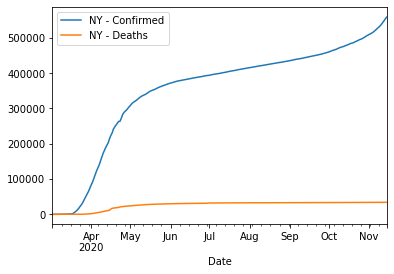

In [57]:
ny = fn.get_state_ts(df_us,'NY',ts_col=['Confirmed','Death'])
ny.plot()

In [58]:
fn.plot_states(df_us,['NY','MD','FL'])

In [6]:
df_world = corona.df

In [7]:
# pfig = fn.plot_group_ts(corona.df,group_list=['US','Italy','Canada',
#                                   'Germany',
#                                         'Mainland China'],group_col='Country/Region',
#                      new_only=True,plot_scatter=False,width=900,height=600)
# pfig

In [8]:
## Get WORLD dictionary with all countries
grouping_col = 'Country/Region'
countries = list(df_world.groupby(grouping_col).groups.keys())

WORLD = {}
for country in countries:
#     print(country)
    WORLD[country] = fn.get_group_ts(df_world,country, grouping_col)

# 🗺Adding Mapping - 07/08

https://plotly.com/python/mapbox-county-choropleth/

In [9]:
df_states = corona.df_us
df_states

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-26,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2020-11-11,Puerto Rico,US,39120.0,901.0,0.0,PR,1.224914e-02,0.000282,0.0
2020-11-12,Puerto Rico,US,40452.0,909.0,0.0,PR,1.266621e-02,0.000285,0.0
2020-11-13,Puerto Rico,US,41119.0,914.0,0.0,PR,1.287506e-02,0.000286,0.0


In [10]:
plot_cols=['Confirmed', 'Deaths','Recovered', 'Confirmed Per Capita',
           'Deaths Per Capita','Recovered Per Capita']

<AxesSubplot:xlabel='Date'>

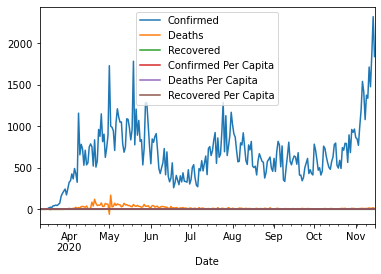

In [12]:
md =df_states.groupby('Province/State').get_group("Maryland")
# md.set_index('Date')),inplace=True)
md[plot_cols].diff().plot()

In [14]:
## Get maximum value for cases by state
max_corona = df_states.groupby('state').max().reset_index()
max_corona.head()

,state,Province/State,Country/Region,Confirmed,Deaths,Recovered,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
0,AK,Alaska,US,23814.0,98.0,0.0,0.032553,0.000134,0.000000e+00
1,AL,Alabama,US,217822.0,3248.0,0.0,0.044425,0.000662,0.000000e+00
2,AR,Arkansas,US,133040.0,2183.0,0.0,0.044085,0.000723,0.000000e+00
3,AZ,"Tempe, AZ",US,275436.0,6302.0,1.0,0.037841,0.000866,1.373868e-07
4,CA,"Yolo County, CA",US,1032095.0,18262.0,6.0,0.026121,0.000462,1.518517e-07


In [15]:
df_states.reset_index(inplace=True)
df_states

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
0,2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
1,2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2,2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
3,2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
4,2020-01-26,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
13920,2020-11-11,Puerto Rico,US,39120.0,901.0,0.0,PR,1.224914e-02,0.000282,0.0
13921,2020-11-12,Puerto Rico,US,40452.0,909.0,0.0,PR,1.266621e-02,0.000285,0.0
13922,2020-11-13,Puerto Rico,US,41119.0,914.0,0.0,PR,1.287506e-02,0.000286,0.0
13923,2020-11-14,Puerto Rico,US,41772.0,921.0,0.0,PR,1.307952e-02,0.000288,0.0


In [16]:
import plotly.express as px

color_column = 'Confirmed'
pfig = px.choropleth(max_corona,color=color_column,locations='state',
              hover_data=['Confirmed','Deaths','Recovered'], 
              hover_name='state',
              locationmode="USA-states", scope='usa',
              title=f"Total {color_column} Cases by State", #projection='natural earth',
              color_continuous_scale=px.colors.sequential.Reds)


pfig.show(config={'scrollZoom': False})

In [17]:
# date_index = df_states.index.to_series()
# date_index[-7:]

In [18]:
from datetime import datetime
date_range = pd.date_range(end=datetime.today(),
                           start = datetime.today()-pd.Timedelta('7 days'),
                          normalize=True,freq='D')
date_range


DatetimeIndex(['2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19'],
              dtype='datetime64[ns]', freq='D')

In [19]:
def plot_map_corona(df_states,color_column = 'Confirmed',
                   hover_data=['Confirmed','Deaths','Recovered']):
    
    ## Get maximum value for cases by state
    max_corona = df_states.groupby('state').max().reset_index()

    pfig = px.choropleth(max_corona,color=color_column,locations='state',
                  hover_data=hover_data, 
                  hover_name='state',
                  locationmode="USA-states", scope='usa',
                  title=f"Total {color_column} Cases by State",
                  color_continuous_scale=px.colors.sequential.Reds)
    pfig.update_layout(autosize=True)#,zoom=False)
    pfig.show(config={'scrollZoom': False})
    return pfig
pmap = plot_map_corona(df_states)

## 📕📕SLICING OUT LAST 7 DAYS 


In [20]:
df_states["Date"].iloc[-1]

Timestamp('2020-11-15 00:00:00')

In [21]:
# pd.date_range()
df_states_ts = df_states.copy()
df_states_ts.set_index("Date",inplace=True)
df_states_ts.sort_index(inplace=True)
df_states_ts


,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,
2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2020-01-24,Chicago,US,1.0,0.0,0.0,IL,7.891526e-08,0.000000,0.0
2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2020-11-15,Ohio,US,298096.0,5722.0,0.0,OH,2.550205e-02,0.000490,0.0
2020-11-15,Alaska,US,23814.0,98.0,0.0,AK,3.255302e-02,0.000134,0.0
2020-11-15,Texas,US,1059753.0,20002.0,0.0,TX,3.654840e-02,0.000690,0.0


In [22]:
def last_N_days(N=7,end =None):
    """Calculates the date that is N days before the end date. 
    If not specified, end = today"""
    if end is None:
        end = datetime.today()
    return end-pd.Timedelta(f'{N} days')

## Getting the 
df_states_ts.loc[last_N_days(N=7,end=df_states["Date"].max()):]

,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
Date,,,,,,,,,
2020-11-08,Idaho,US,72961.0,686.0,0.0,ID,0.040827,0.000384,0.0
2020-11-08,Texas,US,990930.0,19184.0,0.0,TX,0.034175,0.000662,0.0
2020-11-08,Illinois,US,487987.0,10538.0,0.0,IL,0.038510,0.000832,0.0
2020-11-08,Nevada,US,110022.0,1851.0,0.0,NV,0.035720,0.000601,0.0
2020-11-08,Wisconsin,US,281910.0,2312.0,0.0,WI,0.048418,0.000397,0.0
...,...,...,...,...,...,...,...,...,...
2020-11-15,Ohio,US,298096.0,5722.0,0.0,OH,0.025502,0.000490,0.0
2020-11-15,Alaska,US,23814.0,98.0,0.0,AK,0.032553,0.000134,0.0
2020-11-15,Texas,US,1059753.0,20002.0,0.0,TX,0.036548,0.000690,0.0


## TO DO 11/19/20

- [ ] Filter-able time period for map
- Check and verify aggregation function in data classes
    - `get_group_ts`
    - Using `sum` aggregation function. Change to... `.last()`?

In [23]:
df_states['Date'].max()

Timestamp('2020-11-15 00:00:00')

In [24]:
def iplot_map(df_states,color_column = 'Confirmed',
                   hover_data=['Confirmed','Deaths','Recovered'],n_days=3):
    
#     interval = pd.interval_range(freq='D',end= df_states.index[-1],periods=n_days)
    df_states.loc[ df_states['Date'] >last_N_days(n_days,end=df_states['Date'].max())]
    
    ## Get maximum value for cases by state
    max_corona = df_states.groupby('state').max().reset_index()

    pfig = px.choropleth(max_corona,color=color_column,locations='state',
                  hover_data=hover_data, 
                  hover_name='state',
                  locationmode="USA-states", scope='usa',
                  title=f"Total {color_column} Cases by State from the Last {n_days} days",
                  color_continuous_scale=px.colors.sequential.Reds)
    pfig.update_layout(autosize=True)#,zoom=False)
    pfig.show(config={'scrollZoom': False})
#     return pfig
# pmap = plot_map_corona(df_states)
pmap = iplot_map(df_states,n_days=10)

In [25]:
# df_states["Date"]

In [26]:
# df_states.between_time()

In [27]:
## SLICING OUT LAST 7 DAYS 
df_sliced = df_states.loc[ df_states['Date'] >last_N_days(7)].copy()
# df_sliced = df_sliced.set_index('Province/State').drop(columns=['Country/Region'])

## GROUP SLICED DATA BY STATE
grouper = df_sliced.set_index('Date').groupby('state')

## GET EACH STATE TOTALS FOR PERIOD
STATES = {}
for group in grouper.groups:
    
    group_df = grouper.get_group(group).select_dtypes('number')

    STATES[group] =group_df.diff().reset_index().sum()

In [28]:
df_last_week = pd.DataFrame.from_dict(STATES,orient='index')
df_last_week = df_last_week.reset_index().rename({'index':'state'},axis=1)
# df_last_week.index.to_series().rename('state')

In [29]:
plot_map_corona(df_last_week)

### Mini Dash 

In [30]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html

# app = JupyterDash()
# plot_map_corona(df_states)

# 07/09/20 - Updating get_methods, etc to work with plotly fig

In [31]:


def get_methods(obj,private=False):
    """
    Retrieves a list of all non-private methods (default) from inside of obj.
    - If private==False: only returns methods whose names do NOT start with a '_'
    
    Args:
        obj (object): Object to retrieve methods from.
        private (bool): Whether to retrieve private methods or public.

    Returns:
        list: the names of all of the retrieved methods.
    """
    method_list = [func for func in dir(obj) if callable(getattr(obj, func))]
    if private:
        filt_methods = list(filter(lambda x: '_' in x[0] ,method_list))
    else:
        filt_methods = list(filter(lambda x: '_' not in x[0] ,method_list))
    return  filt_methods

def get_attributes(obj,private=False):
    """
    Retrieves a list of all non-private attributes (default) from inside of obj.
    - If private==False: only returns methods whose names do NOT start with a '_'
    
    Args:
        obj (object): Object to retrieve attributes from.
        private (bool): Whether to retrieve private attributes or public.
    
    Returns:
        list: the names of all of the retrieved attributes.
    """
    method_list = [func for func in dir(obj) if not callable(getattr(obj, func))]
    if private:
        filt_methods = list(filter(lambda x: '_' in x[0] ,method_list))
    else:
        filt_methods = list(filter(lambda x: '_' not in x[0] ,method_list))
    return  filt_methods

def get_methods_attributes_df(obj,include_private=False):
    """
    Retrieves all attributes and methods (with docstrings)
    and returns them in a DataFrame. By default only retrieves
    non-private methods, unless include_privates==True
    Args:
        obj (object): object to retrieve methods/attributes from
        include_privates (bool): Whether to include private methods/attributes
    
    Returns:
        Frame: DataFrame with results.
    """
    import pandas as pd
    methods = get_methods(obj,private=False)
    method_types = ['Method' for item in methods]

    attrs = get_attributes(obj,private=False)
    att_types =['Attribute' for item in attrs]
    
    if include_private:
        private_methods = get_methods(obj,private=True)
        methods.extend(private_methods)
        method_types.extend(['Private Method' for item in private_methods])
        
        private_attrs = get_attributes(obj,private=True)
        attrs.extend(private_attrs)
        att_types.extend(['Private Attribute' for item in private_attrs])
    
    
    docs=[]
    for m in methods:
        att = getattr(obj,m)
        docs.append(att.__doc__)

    all_res = [*methods,*attrs]
    res_type = [*method_types,*att_types]#['Method' for item in methods]+['Attribute' for item in attrs]
    docstrings= docs + ['na' for i in attrs]

    df_obj = pd.DataFrame({'Object':all_res,'Type':res_type,'Doc':docstrings})
    return df_obj


In [32]:
for obj in dir(pmap):
    print(obj)
    

__bool__
__class__
__delattr__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__


## Geocoding

In [33]:
df = corona.df_us
df

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered,state,Confirmed Per Capita,Deaths Per Capita,Recovered Per Capita
0,2020-01-22,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
1,2020-01-23,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
2,2020-01-24,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
3,2020-01-25,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
4,2020-01-26,Washington,US,1.0,0.0,0.0,WA,1.313216e-07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
13920,2020-11-11,Puerto Rico,US,39120.0,901.0,0.0,PR,1.224914e-02,0.000282,0.0
13921,2020-11-12,Puerto Rico,US,40452.0,909.0,0.0,PR,1.266621e-02,0.000285,0.0
13922,2020-11-13,Puerto Rico,US,41119.0,914.0,0.0,PR,1.287506e-02,0.000286,0.0
13923,2020-11-14,Puerto Rico,US,41772.0,921.0,0.0,PR,1.307952e-02,0.000288,0.0


In [34]:
# !pip install geopandas
# !pip install geopy

In [35]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")
res = locator.geocode('Baltimore')
res.latitude,res.longitude

(39.2908816, -76.610759)

In [36]:
# stop

## LEFTOVERS

In [37]:
# covid = fn.CovidTrackingProject(download=True,verbose=True)
# covid

In [38]:
# covid.df_us[['positive','negative','death','recovered',
# 'hospitalizedCurrently', 'hospitalizedCumulative',
#  'inIcuCurrently', 'inIcuCumulative', 
#  'onVentilatorCurrently','onVentilatorCumulative', 
#  'states','pending','dateChecked', 'hash',]]

In [39]:
# covid.columns['good']

In [40]:
# covid.df_states

In [41]:
# df_us = covid.df_us.copy()
# # sorted(list(df_us.columns))
# df_us.columns

In [42]:
# df_us['fips']

In [43]:
# good_us_cols = ['dateChecked','death', 'hash', 'hospitalizedCumulative',
#  'hospitalizedCurrently','inIcuCumulative', 'inIcuCurrently',
#  'negative', 'onVentilatorCumulative', 'onVentilatorCurrently',
#  'pending','positive','recovered','states']

# dep_us_cols = ['hospitalized', 'lastModified', 'total', 
#              'totalTestResults', 'posNeg', 'deathIncrease',
#             'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 
#             'totalTestResultsIncrease']#[col for col in df_us.columns if col not in good_us_cols]
# # print(dep_cols)

In [44]:
# df = covid.df_us[covid.columns_us['good']].copy()
# df[good_us_cols]

In [45]:
# covid

In [46]:
# covid.US

#  📕Covid Tracking Project Data

https://covidtracking.com/api

`/api/v1/states/{state}/screenshots.csv`

## 📦 class `CovidTrackingProject`

In [47]:
covid = fn.CovidTrackingProject(download=True,verbose=True)
covid

[i] DOWNLOADING DATASETS FROM COVID TRACKING PROJECT
	https://covidtracking.com/data
	- File saved as: "New Data/states_metadata.csv"
ERROR
	- File saved as: "New Data/us.csv"
	- File saved as: "New Data/states.csv"
states


------------------------------------------------------------
[i] CovidTrackingProject Contents:
------------------------------------------------------------

METHODS:
	download_state_daily
	download_state_meta
	download_us_daily
	get_csv_save_load
	get_df
	get_group_ts
	help

ATTRIBUTES
	base_folder
	base_url
	columns
	columns_us
	df
	df_states
	df_us
	urls

In [48]:
df_us = covid.get_df(which='us')
df_us

,positive,negative,death,recovered,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,states,pending,dateChecked,hash
date,,,,,,,,,,,,,,
2020-11-18,11373310,138907553,241704.0,4348089.0,79410.0,529168.0,15350.0,27989.0,4701.0,3024.0,56,12971.0,2020-11-18T24:00:00Z,5dc1b316e5e7b6ecaff11b00041cf335793ee775
2020-11-17,11209335,137833090,239835.0,4292094.0,76958.0,524678.0,14851.0,27681.0,4379.0,3004.0,56,9281.0,2020-11-17T24:00:00Z,4b92f29fcf980dedba895d88f44d26ea816be797
2020-11-16,11052613,136740628,238280.0,4242683.0,73268.0,520763.0,14317.0,27437.0,4166.0,2988.0,56,13639.0,2020-11-16T24:00:00Z,b556091da971f8138e0eaf7ac994d0338e4d742c
2020-11-15,10903745,135637101,237643.0,4183378.0,70113.0,517615.0,13693.0,27269.0,3939.0,2975.0,56,13654.0,2020-11-15T24:00:00Z,2c761b5acd54d250ddcaa0dbcee9b8365d0cb3c6
2020-11-14,10759311,134474547,236966.0,4146419.0,69498.0,515739.0,13337.0,27172.0,3945.0,2972.0,56,13657.0,2020-11-14T24:00:00Z,26be9bfa6f792c85562ca2d6ad1670294dd1b66d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2020-01-26T24:00:00Z,69c67c81e64d10a5270497fc5336779c06fb812b
2020-01-25,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2020-01-25T24:00:00Z,9ea5731f5b0a79617b994d6842eecfdbeb1dde35
2020-01-24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2020-01-24T24:00:00Z,287531342bc8d5f2650b0cc12ebcca3807a64b7b


### def `iplot_cols`

In [49]:

def iplot_cols(df_us,cols='icu'):
    pfig = df_us[[col for col in df_us.columns if cols in col.lower()]].iplot()#kind=kind)
    return pfig

In [50]:
iplot_cols(df_us,'hospital')

In [51]:
iplot_cols(df_us,'icu')

In [52]:
iplot_cols(df_us,'vent')

In [53]:
covid.columns_us['good']

['positive',
 'negative',
 'death',
 'recovered',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'states',
 'pending',
 'dateChecked',
 'hash']

In [54]:
df_states = covid.get_df()
df_states

,state,fips,positive,negative,death,recovered,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,lastUpdateEt,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-11-18,AK,2,24419.0,861139.0,100.0,7165.0,147.0,584.0,NaN,NaN,...,11/18/2020 03:59,885558.0,28879.0,856173.0,NaN,545,885558.0,6936,0,22
2020-11-18,AL,1,223486.0,1294045.0,3347.0,88038.0,1303.0,23088.0,NaN,2165.0,...,11/18/2020 11:00,1481668.0,NaN,NaN,187623.0,2638,1481668.0,8122,46,372
2020-11-18,AR,5,137617.0,1415302.0,2275.0,118751.0,893.0,8139.0,339.0,NaN,...,11/18/2020 00:00,1537783.0,NaN,1415302.0,122481.0,1715,1537783.0,12504,30,89
2020-11-18,AS,60,0.0,1988.0,0.0,NaN,NaN,NaN,NaN,NaN,...,11/17/2020 00:00,1988.0,NaN,NaN,0.0,0,1988.0,0,0,0
2020-11-18,AZ,4,283102.0,1743653.0,6365.0,46521.0,1700.0,23473.0,396.0,NaN,...,11/18/2020 00:00,NaN,NaN,NaN,275342.0,3206,2018995.0,14787,53,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,WA,53,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0,0
2020-01-23,MA,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,NaN,NaN,0,2.0,1,0,0
2020-01-23,WA,53,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0,0


# APPENDIX

In [55]:
## Load in Fips Data
fips = pd.read_csv('Reference Data/ZIP-COUNTY-FIPS_2018-03.csv')
fips.groupby('STATE').get_group("NY")['STCOUNTYFP'].value_counts()

36061    129
36103    112
36029     91
36119     86
36059     83
        ... 
36123     16
36035     15
36099     15
36041     14
36085     14
Name: STCOUNTYFP, Length: 62, dtype: int64

In [56]:
fips.loc[fips['STCOUNTYFP']==36]

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP


In [57]:

df = covid.STATES
df['fips']

AttributeError: 'CovidTrackingProject' object has no attribute 'STATES'

In [ ]:
# #     def __init__(self):
# tracking = CovidTrackingProject()
# states_daily = tracking.download_state_daily()
# us_daily=tracking.download_us_daily()
# state_meta = tracking.download_state_meta()
# display(states_daily.head(),us_daily.head(),state_meta.head())

In [ ]:
# covid = CovidTrackingProject(download=True)
# state_meta = covid.data['states_metadata']
# states_daily = covid.data['states']
# state_list = state_meta['state'].unique()
# states_daily

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# report  = ProfileReport(states_daily)


## NOTES: COLUMNS TO PLOT

- Basic Stats:
    - death: cumulative total people died
    - positive: total number people positive so far
    - negative
    - recovered
    

- Hospitalization:
    - hospitalizedCumulative: total number hospital so far(recovered and dead)
    - hospitalizedCurrently: 
    - hospitalizedIncrease


- ICU:
    - inIcuCumulative: total number hospital so far(recovered and dead)
    - inIcuCurrently: 
    
- Ventilator 
    - onVentilatorCumulative
    - onVentilatorCurrently


In [ ]:

covid.columns

In [ ]:
NY = states_daily.groupby('state').get_group('NY')[covid.columns['good']]
NY

## Folium

In [ ]:
# import folium
# center = (res.latitude,res.longitude) #(resp['region']['center']['latitude'],resp['region']['center']['longitude'])

# popup = folium.Popup(f"Latitude={center[0]}, Longitude={center[1]}")
# marker = folium.Marker(center,popup)
# mymap = folium.Map(center)
# marker.add_to(mymap)
# mymap